## Machine Learning: An Example of Complete Classification

In this guided notebook we are going to compare a bit algorithms for classification and show everything you'll need.

#### 1.0 — Initial Libraries to Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 2.0 — DATA IMPORT
In this part, we import the data we are going to use.

In [2]:
data = pd.DataFrame(pd.read_excel('datasets/pca.xlsx'))

#### 3.0 — DATA STATISTICS
In this part, to get to know the dataframe, we have shared some mathematical statistics for the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alcohol           178 non-null    float64
 1   Malic Acid        178 non-null    float64
 2   Ash               178 non-null    float64
 3   Alcanity          178 non-null    float64
 4   Magnesium         178 non-null    int64  
 5   Total Phenols     178 non-null    float64
 6   Flavanoids        178 non-null    float64
 7   Phenols           178 non-null    float64
 8   Proanthocyanins   178 non-null    float64
 9   Color Intensity   178 non-null    float64
 10  Hue               178 non-null    float64
 11  OD280             178 non-null    float64
 12  Proline           178 non-null    int64  
 13  Customer Segment  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.describe()

,Alcohol,Malic Acid,Ash,Alcanity,Magnesium,Total Phenols,Flavanoids,Phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline,Customer Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


This attribute is simply determines how many vacant features in this provided columns.

In [5]:
data.isna().sum()

Alcohol             0
Malic Acid          0
Ash                 0
Alcanity            0
Magnesium           0
Total Phenols       0
Flavanoids          0
Phenols             0
Proanthocyanins     0
Color Intensity     0
Hue                 0
OD280               0
Proline             0
Customer Segment    0
dtype: int64

In [6]:
data.corr()

,Alcohol,Malic Acid,Ash,Alcanity,Magnesium,Total Phenols,Flavanoids,Phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline,Customer Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


#### 4.0 — MANIPULATING & ENCODING
In this part, we are removing the string columns / nan value columns from our dataset, the reason behind is:

* String columns / NaN value columns cannot be used for M.L. & D.L. applications because they are string, if they will be useful for further steps we are going to use them by converting them to the numerical features (encoding section).

In [7]:
# There is no column we have to encode or delete.

# this is our y, varibale we'll store it first, drop it later. then we are going to use it.
Y = data['Customer Segment'].values
data = data.drop(axis=1, columns=['Customer Segment'])

#### 5.0 — SLICING
In this part, if have to, we can filter the dataframe by its columns. (but for this application, we don't need to do it.)

In [8]:
"""
slicingmode= '1'
if slicingmode == '1':
    data = data.loc[:, 599.753:3800.044]
elif slicingmode  == '2':
    df1 = data.loc[:, 2600.538:3000.695]
    df2 = data.loc[:, 800.314:1200.471]

    data = pd.concat([df2,df1], axis = 1)
elif slicingmode  == '3':
    data = data.loc[:, 800.314:1200.471]
elif slicingmode  == '4':
    data = data.loc[:, 2600.538:3000.695]
else:
    data = data.loc[:, 599.753:3800.044]
"""

# Variable definings.
total_columns = len(list(data.columns))
total_rows = len(list(data.index))

#### 6.0 — PREPERATION FOR M.L. APPLICATION
So in this part, we are going to determine our train & test values to apply our Machine Learning set.

In [9]:
x = data.values
y = Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

total_train_features, total_test_features = len(list(x_train)), len(list(x_test))

#### 6.1 — PCA APPLICATION

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

#### 7.0 — DATA SCALING

In [11]:
# Importing Preprocessing Algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SCALER = StandardScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)

#### 8.0 — M.L. APPLICATION
* KNN(K-Nearest Neighbors) Classifier

Also confusion matrix and a few important metrics have been printed down below.

In [12]:
# Model Selection
# Importing ML Algorithms
from sklearn.linear_model import LogisticRegression

# Importing Accuracy Alogirthms
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

LR = LogisticRegression()

def resume(model, title, codex, a, b):

    model.fit(a, y_train)
    y_predicted = model.predict(b)

    ACC = round(accuracy_score(y_test, y_predicted)*100,3)

    classification_report(y_test,y_predicted)
    plot_confusion_matrix(model, b, y_test)
    plt.title(f'{title} - {codex}')
    plt.show()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


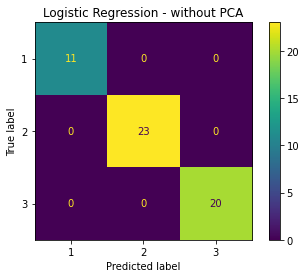

In [13]:
resume(LR, 'Logistic Regression', 'without PCA', x_train, x_test)

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


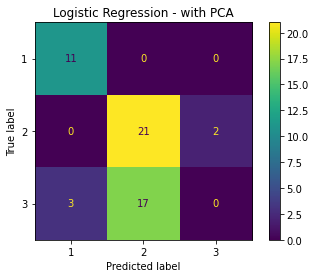

In [14]:
resume(LR, 'Logistic Regression', 'with PCA', x_train_pca, x_test_pca)